# Exercise 1
Misurazione dell’overlap lessicale tra una serie di definizioni per concetti generici/specifici e concreti/astratti.

In [61]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
import statistics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('pattern')
nltk.download('averaged_perceptron_tagger')

lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Alberto\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Alberto\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Alberto\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Error loading pattern: Package 'pattern' not found in
[nltk_data]     index
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Alberto\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [62]:
filename = 'TLN-definitions-23.tsv'
DEVIATION=4 #Use to refine dataset, represent the maximum deviation from the average length of descriptions

## Define Function
Define all function use to elaborate and calculate similarity

In [63]:
def parse_tsv_file(file_path):
    df = pd.read_csv(file_path, sep='\t')
    return df

#Use to return the average length of phrases in Corpus
def average_length(list):
    lengths = [len(sublist) for sublist in list]
    avg_length = statistics.mean(lengths)
    return avg_length

#Use calculate the intersection between two phrase, perform the lexical overlap
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

#Calculate similarity as lexical overlap
def calc_similarity(lists):
    result = 0
    for list1 in lists:
        for list2 in lists:
            if list2 != list1:
                result += len(intersection(list1, list2)) / min(len(list1), len(list2))
    return result / (pow(len(lists),2) - (len(lists)))

#Prune all phrase that more different of DEVIATION from the average of length
def refine_dataset(dataset,k):
    for key in dataset:
        avg = int(average_length(dataset[key]))
        dataset[key] = [elem for elem in  dataset[key] if abs(len(elem)-avg) <= k]
        avg = int(average_length(dataset[key]))
    return dataset

#Lemmatize phrase and set all verb in infinitive form
def lemmatized_tokens(text):
    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    lemmas = []
    for token, tag in pos_tag(tokens):
        if token.isalpha() and token not in stop_words:
            if tag.startswith('VB'):
                lemmas.append(lemmatizer.lemmatize(token, pos='v'))
            else:
                lemmas.append(lemmatizer.lemmatize(token))
    return lemmas

# Elaborate Dataset
Create a dictionary contains as key the concept and value of lemmatized phrases

In [64]:
def elaborate_dataset(dataframe):
    dataset = {
        'door': [],
        'ladybug': [],
        'pain': [],
        'blurriness': []
    }
    dataframe = dataframe.iloc[:, 1:]  # Rimuovi la prima colona
    for index, row in dataframe.iterrows():
        for column in dataframe.columns:
            dataset[column].extend([lemmatized_tokens(row[column])])
    return dataset


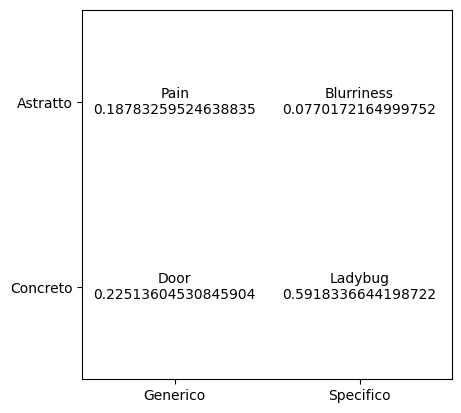

In [65]:
dataset = elaborate_dataset(parse_tsv_file(filename))

matrix = np.array([[calc_similarity(dataset['pain']), calc_similarity(dataset['blurriness'])],
                    [calc_similarity(dataset['door']), calc_similarity(dataset['ladybug'])]])
label_matrix = np.array([['Pain', 'Blurriness'],
                    ['Door', 'Ladybug']])

# Etichette delle righe e delle colonne
label_row = ['Astratto', 'Concreto']
label_column = ['Generico', 'Specifico']

# Creazione del grafico a matrice
fig, ax = plt.subplots()
im = ax.imshow(matrix, cmap='viridis', alpha=0.0)

# Aggiunta delle etichette delle righe e delle colonne
ax.set_xticks(np.arange(len(label_column)))
ax.set_yticks(np.arange(len(label_row)))
ax.set_xticklabels(label_column)
ax.set_yticklabels(label_row)


for i in range(len(label_row)):
    for j in range(len(label_column)):
        text = ax.text(j, i, f"{label_matrix[i, j]}\n{matrix[i, j]}", ha='center', va='center')



## Refine Dataset
Prune from dataset all phrases shorter than average of length of all phrases plus DEVIATION constants

In [66]:
dataset = refine_dataset(elaborate_dataset(parse_tsv_file(filename)),DEVIATION)

## Show the output

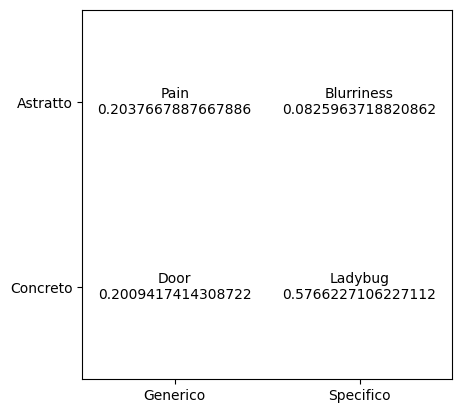

In [67]:
matrix = np.array([[calc_similarity(dataset['pain']), calc_similarity(dataset['blurriness'])],
                    [calc_similarity(dataset['door']), calc_similarity(dataset['ladybug'])]])
label_matrix = np.array([['Pain', 'Blurriness'],
                    ['Door', 'Ladybug']])


# Etichette delle righe e delle colonne
label_row = ['Astratto', 'Concreto']
label_column = ['Generico', 'Specifico']

# Creazione del grafico a matrice
fig, ax = plt.subplots()
im = ax.imshow(matrix, cmap='viridis', alpha=0.0)

# Aggiunta delle etichette delle righe e delle colonne
ax.set_xticks(np.arange(len(label_column)))
ax.set_yticks(np.arange(len(label_row)))
ax.set_xticklabels(label_column)
ax.set_yticklabels(label_row)


for i in range(len(label_row)):
    for j in range(len(label_column)):
        text = ax.text(j, i, f"{label_matrix[i, j]}\n{matrix[i, j]}", ha='center', va='center')


